In [2]:
!pip install svgwrite cairosvg


     -------------------------------------- 67.1/67.1 kB 605.1 kB/s eta 0:00:00
     ---------------------------------------- 43.2/43.2 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 75.6/75.6 kB 2.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot(paths_XYs, title=""):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, XYs in enumerate(paths_XYs):
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], linewidth=2)
    ax.set_aspect('equal')
    plt.title(title)
    plt.show()

# Unzip the problems.zip file
with zipfile.ZipFile('C:/Users/KUMAR BIMAL/Downloads/problems.zip', 'r') as zip_ref:
    zip_ref.extractall('C:/Users/KUMAR BIMAL/Downloads/problems')

# List files in the extracted directory
extracted_files = os.listdir('C:/Users/KUMAR BIMAL/Downloads/problems')
print(extracted_files)

# Assuming you want to read and plot a csv file from the extracted directory
for file in extracted_files:
    if file.endswith('.csv'):
        csv_path = os.path.join('C:/Users/KUMAR BIMAL/Downloads/problems', file)
        paths_XYs = read_csv(csv_path)
        plot(paths_XYs, title=file)

['problems', '__MACOSX']


UnboundLocalError: local variable 'is_ellipse' referenced before assignment

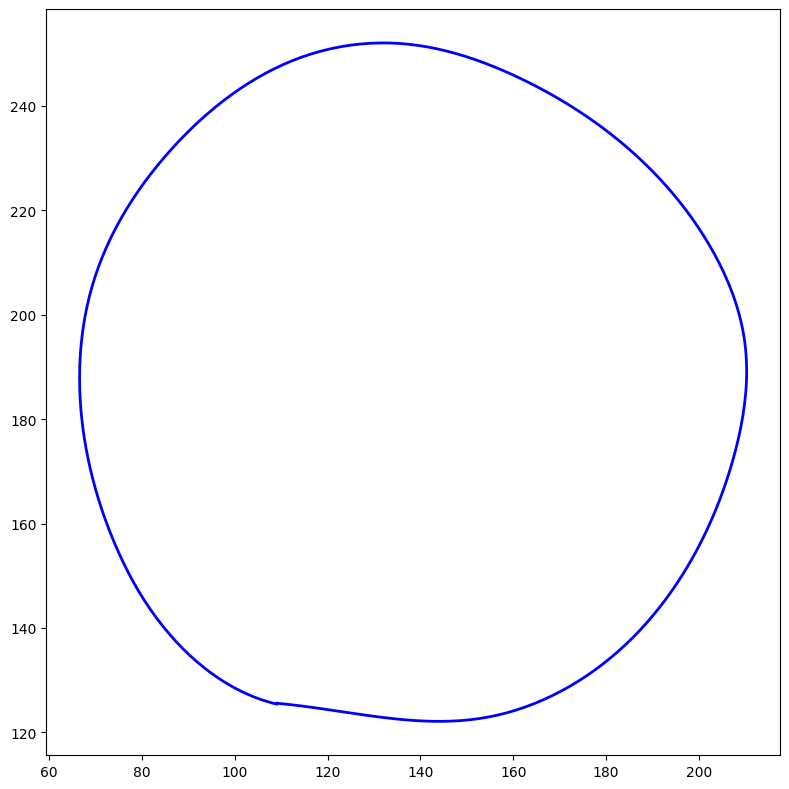

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def is_straight_line(points, tolerance=0.01):
    x = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)
    residuals = np.abs(y - y_pred)
    return np.all(residuals < tolerance), model

def is_circle(points, tolerance=0.01):
    x = points[:, 0]
    y = points[:, 1]
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    radius = np.mean(np.sqrt((x - x_mean) ** 2 + (y - y_mean) ** 2))
    residuals = np.abs(np.sqrt((x - x_mean) ** 2 + (y - y_mean) ** 2) - radius)
    return np.all(residuals < tolerance), (x_mean, y_mean, radius)

def plot_straight_line(model, points, ax, color='r'):
    x = np.linspace(points[:, 0].min(), points[:, 0].max(), 100)
    y = model.predict(x.reshape(-1, 1))
    ax.plot(x, y, color=color, linewidth=2)

def plot_circle(center, radius, ax, color='r'):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = center[0] + radius * np.cos(theta)
    y = center[1] + radius * np.sin(theta)
    ax.plot(x, y, color=color, linewidth=2)
def is_ellipse(points, tolerance=0.01):
    x = points[:, 0]
    y = points[:, 1]
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    a = np.max(np.sqrt((x - x_mean) ** 2 + (y - y_mean) ** 2))
    b = np.min(np.sqrt((x - x_mean) ** 2 + (y - y_mean) ** 2))
    residuals = np.abs(np.sqrt((x - x_mean) ** 2 + (y - y_mean) ** 2) - a)
    return np.all(residuals < tolerance), (x_mean, y_mean, a, b)

def is_rectangle(points, tolerance=0.01):
    x = points[:, 0]
    y = points[:, 1]
    x_min, x_max = np.min(x), np.max(x)
    y_min, y_max = np.min(y), np.max(y)
    residuals = np.abs(x - x_min) + np.abs(x - x_max) + np.abs(y - y_min) + np.abs(y - y_max)
    return np.all(residuals < tolerance), (x_min, x_max, y_min, y_max)

def is_polygon(points, tolerance=0.01):
    # Implementation for polygon detection
    pass
def visualize_shapes(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for XYs in paths_XYs:
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], 'b', linewidth=2)
            is_line, model = is_straight_line(XY)
            if is_line:
                plot_straight_line(model, XY, ax, color='r')
            is_circ, params = is_circle(XY)
            if is_circ:
                plot_circle(params[:2], params[2], ax, color='g')
            is_ellipse, params = is_ellipse(XY)
            if is_ellipse:
                plot_ellipse(params[:2], params[2], params[3], ax, color='y')
            is_rect, params = is_rectangle(XY)
            if is_rect:
                plot_rectangle(params[:2], params[2], params[3], ax, color='c')
    ax.set_aspect('equal')
    plt.show()

# Load and visualize a test case
paths_XYs = read_csv('C:/Users/KUMAR BIMAL/Downloads/problems/problems/isolated.csv')
visualize_shapes(paths_XYs)

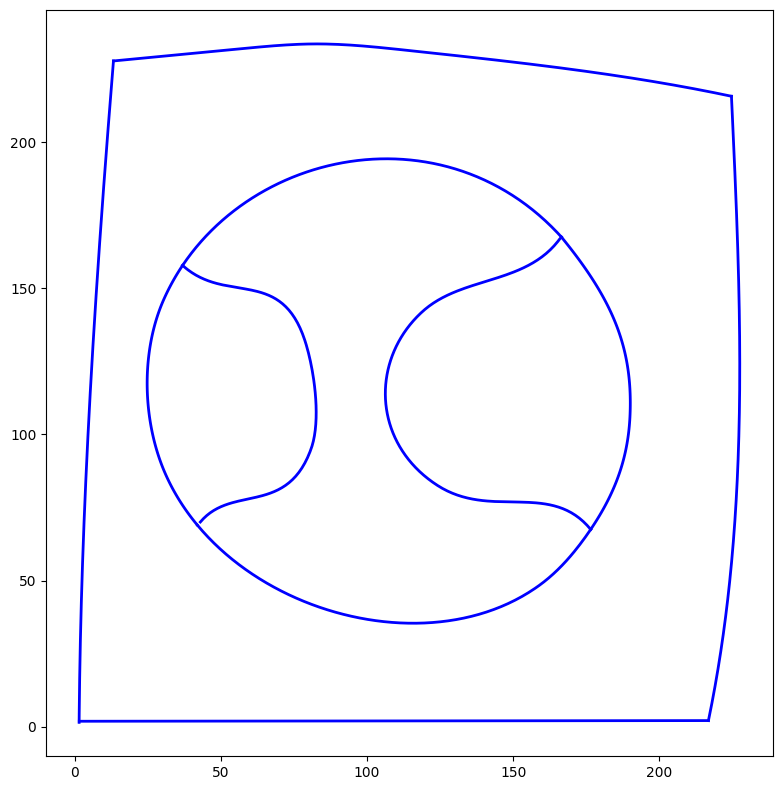

In [12]:
def check_symmetry(points, tolerance=0.01):
    centroid = np.mean(points, axis=0)
    reflected_points = 2 * centroid - points
    distances = np.linalg.norm(points - reflected_points, axis=1)
    return np.all(distances < tolerance)

def visualize_symmetry(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for XYs in paths_XYs:
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], 'b', linewidth=2)
            if check_symmetry(XY):
                ax.plot(XY[:, 0], XY[:, 1], 'g--', linewidth=2)
    ax.set_aspect('equal')
    plt.show()

# Load and visualize symmetry in a test case
paths_XYs = read_csv("C:/Users/KUMAR BIMAL/Downloads/problems/problems/frag0.csv")
visualize_symmetry(paths_XYs)

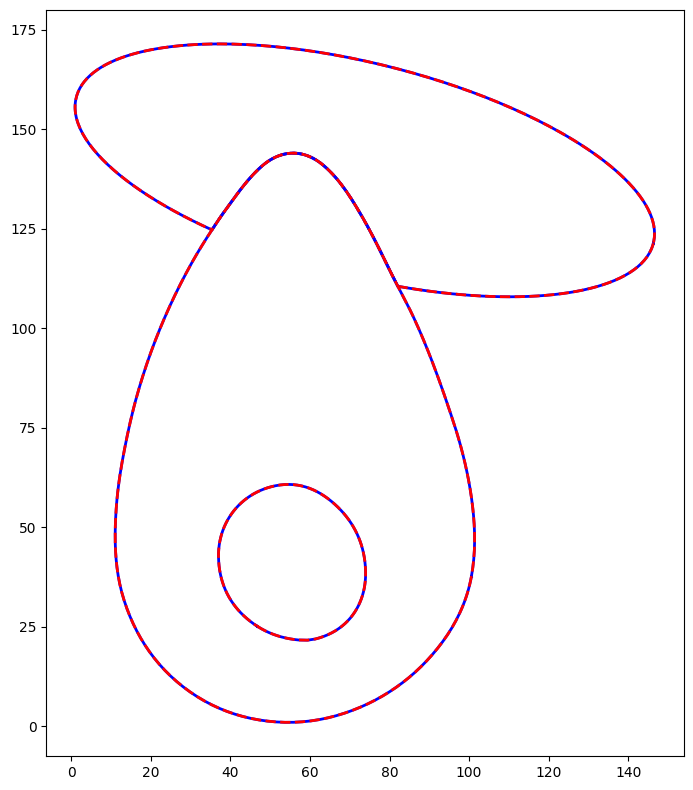

In [13]:
def complete_curve(points, tolerance=0.01):
    start_point = points[0]
    end_point = points[-1]
    completed_points = np.vstack((points, end_point))
    return completed_points

def visualize_curve_completion(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for XYs in paths_XYs:
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], 'b', linewidth=2)
            completed_points = complete_curve(XY)
            ax.plot(completed_points[:, 0], completed_points[:, 1], 'r--', linewidth=2)
    ax.set_aspect('equal')
    plt.show()

# Load and visualize curve completion in a test case
paths_XYs = read_csv("C:/Users/KUMAR BIMAL/Downloads/problems/problems/occlusion1.csv")
visualize_curve_completion(paths_XYs)

Testing frag0.csv...


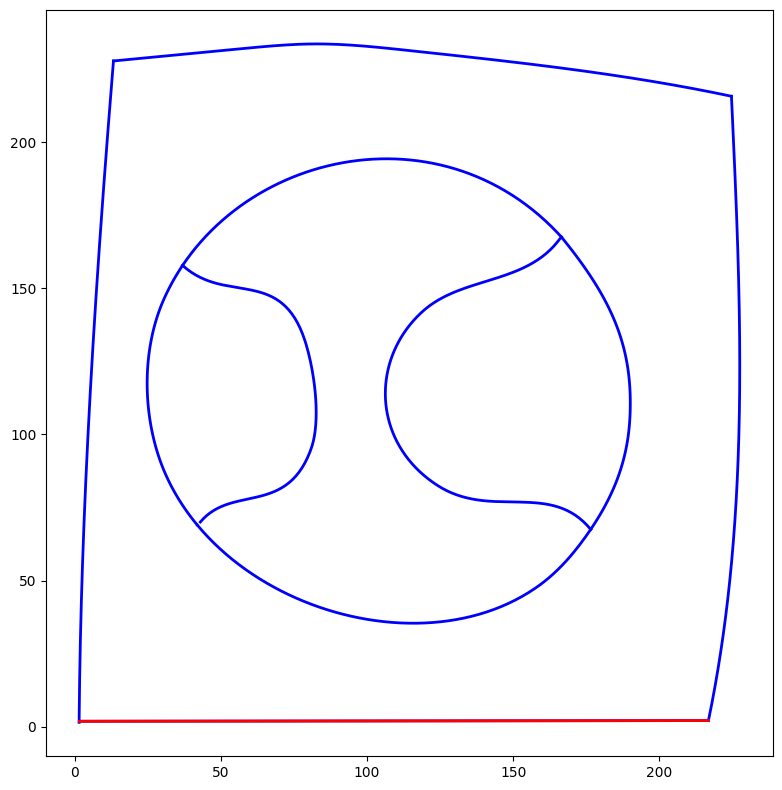

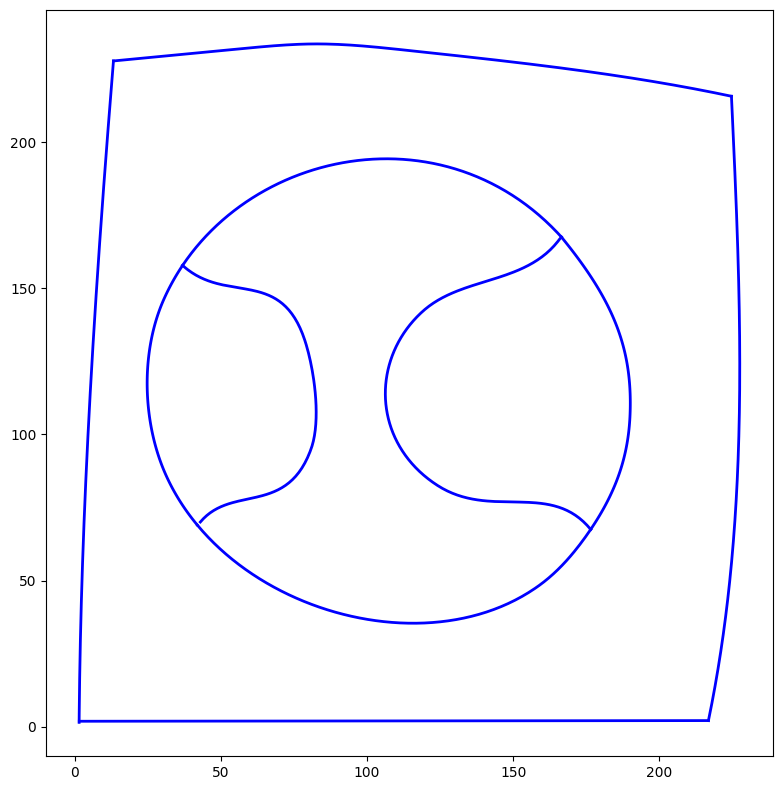

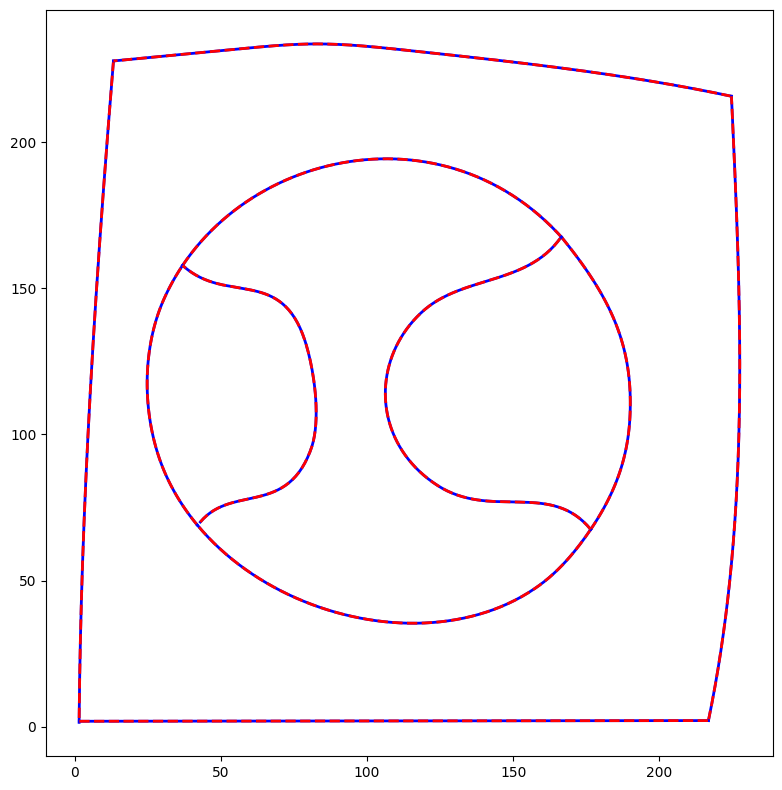

Testing frag01_sol.csv...


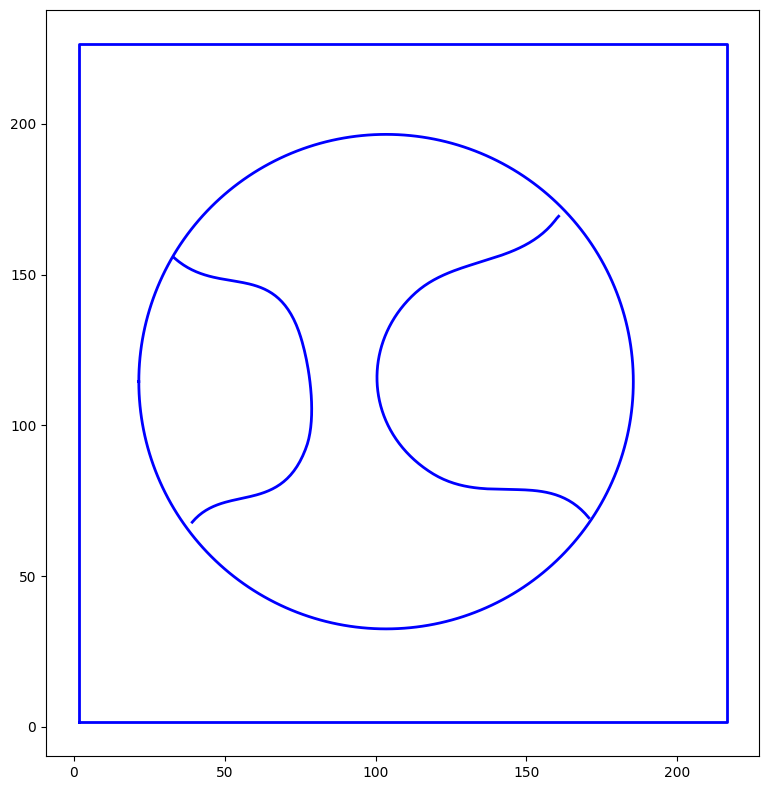

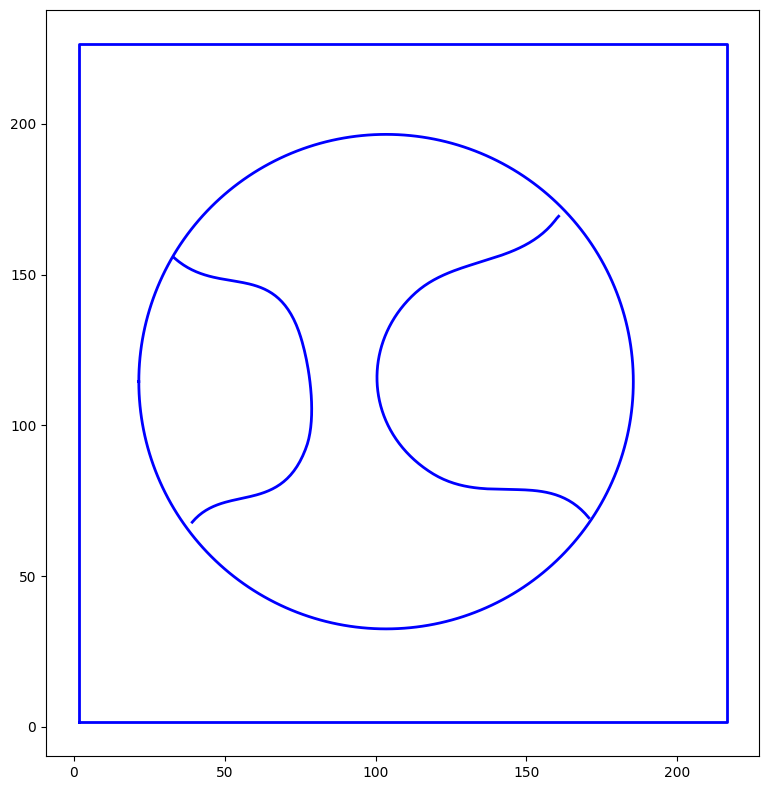

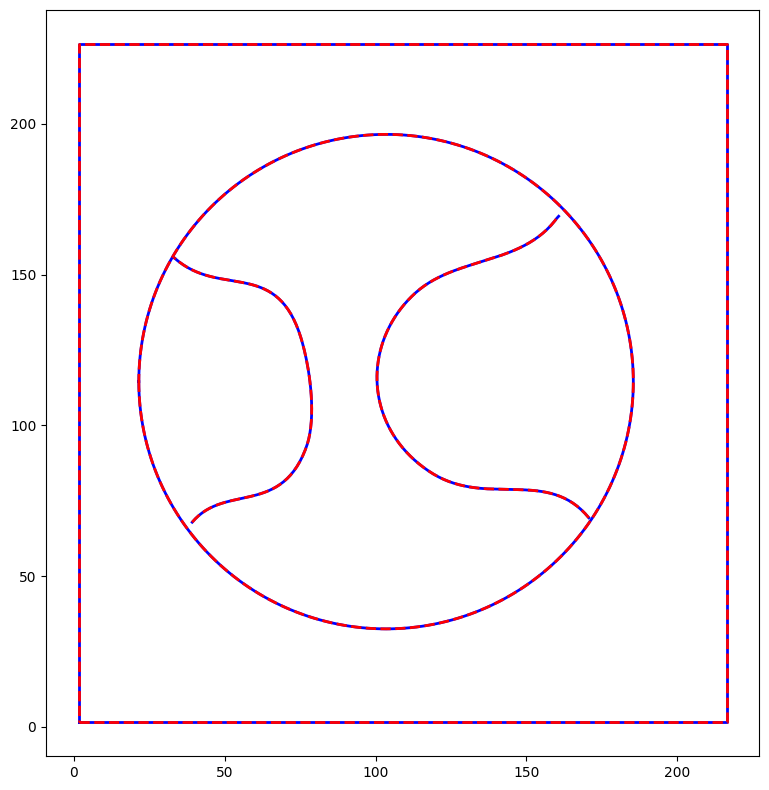

Testing frag1.csv...


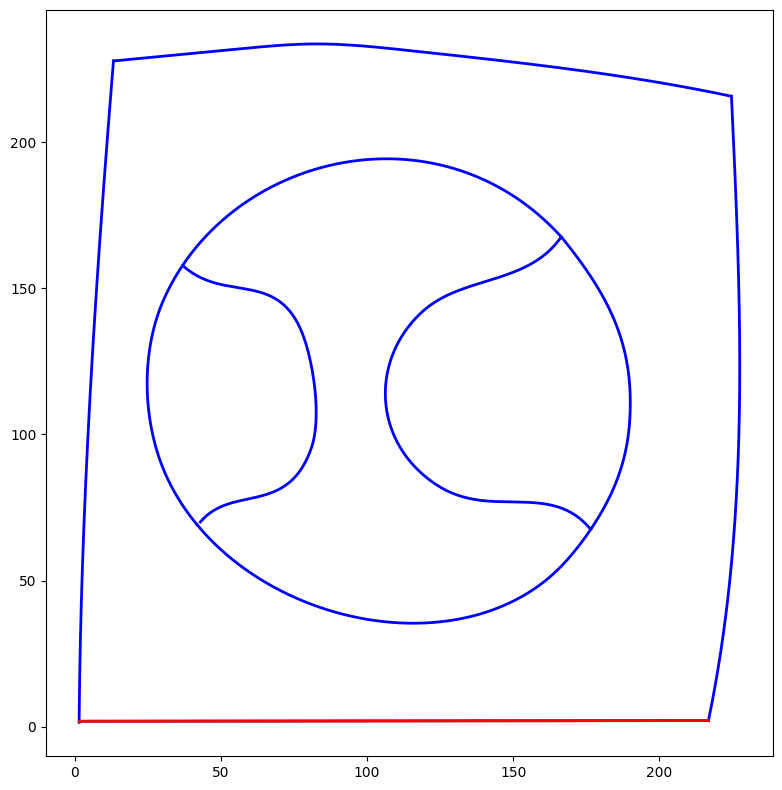

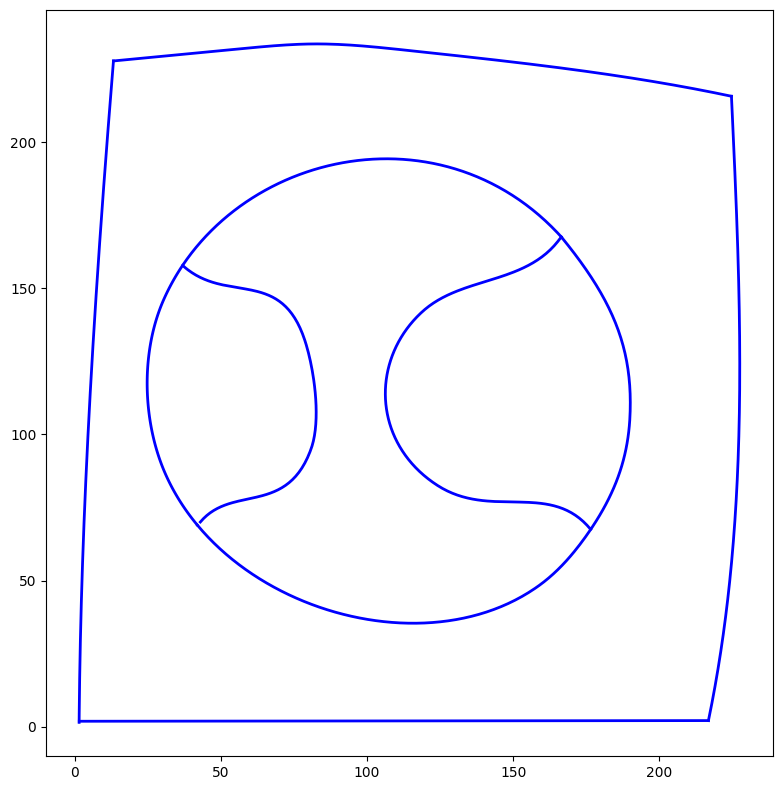

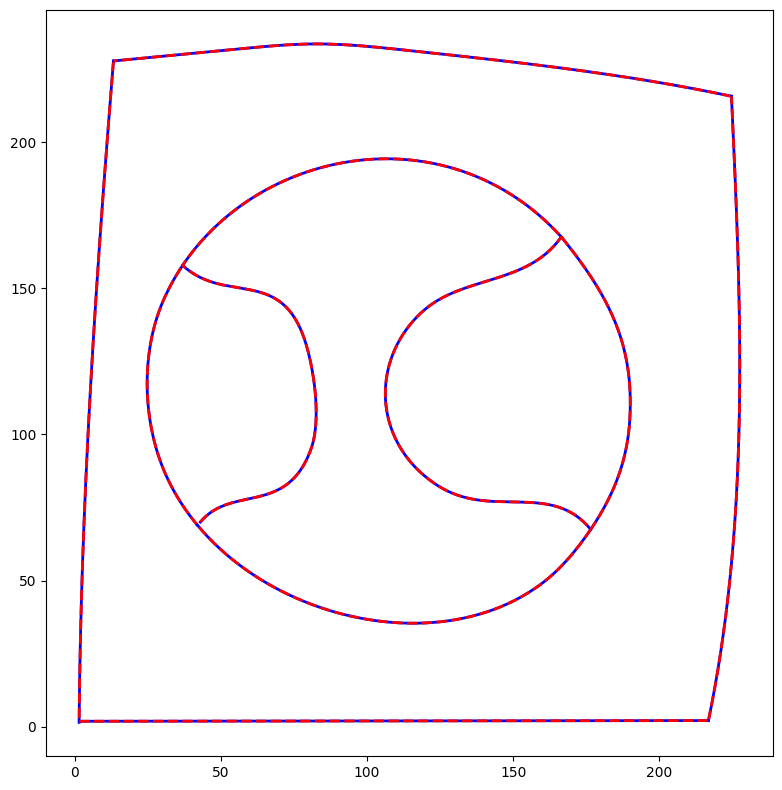

Testing frag2.csv...


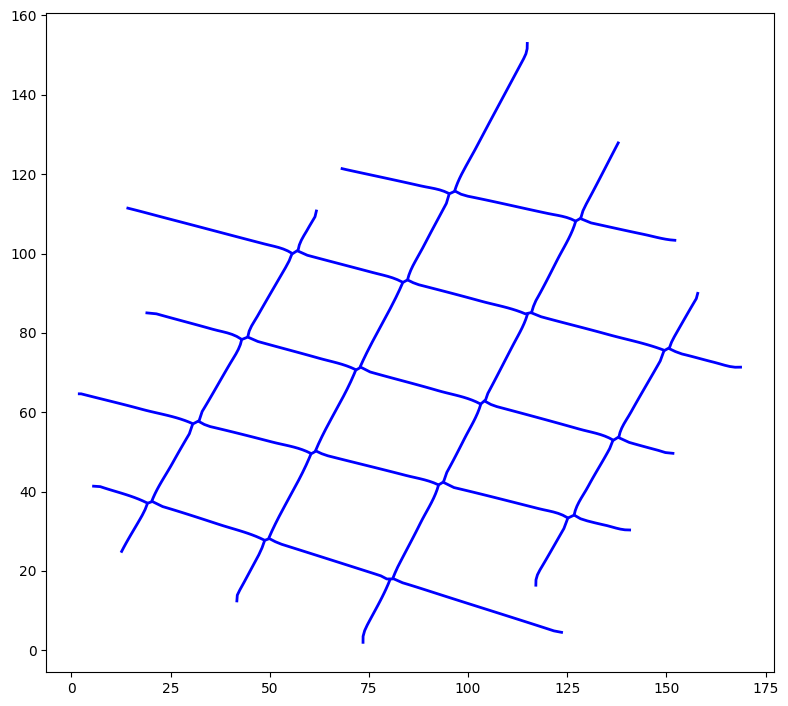

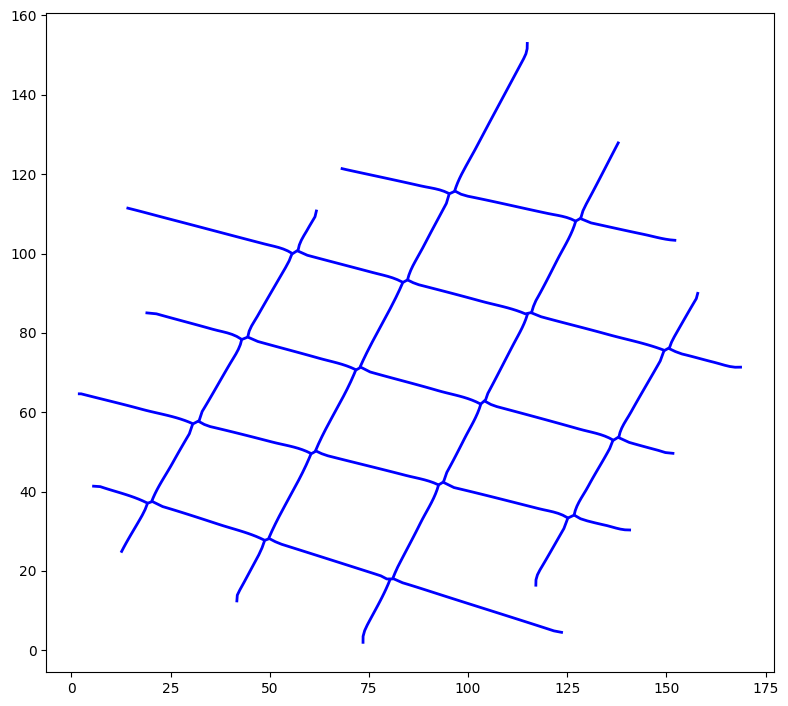

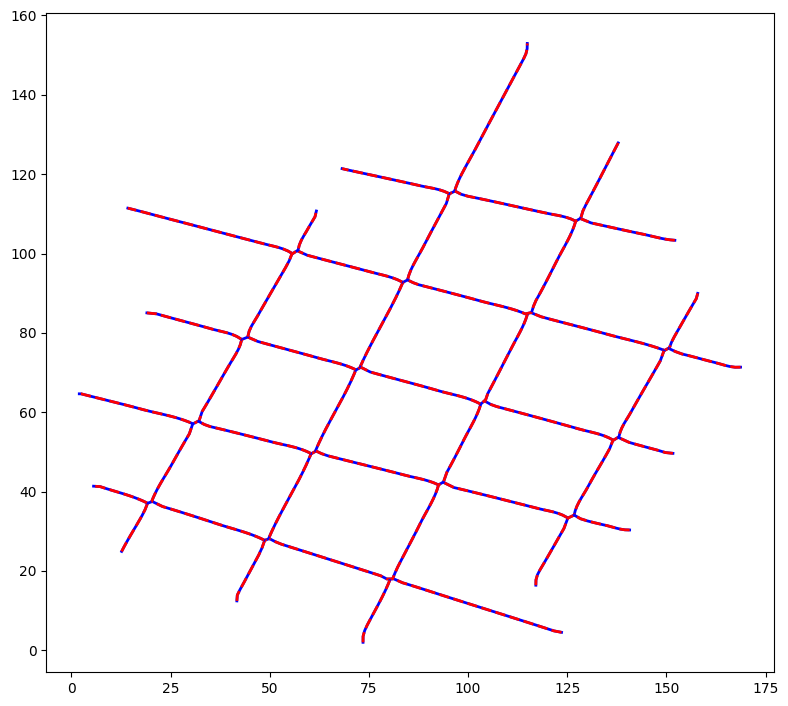

Testing frag2_sol.csv...


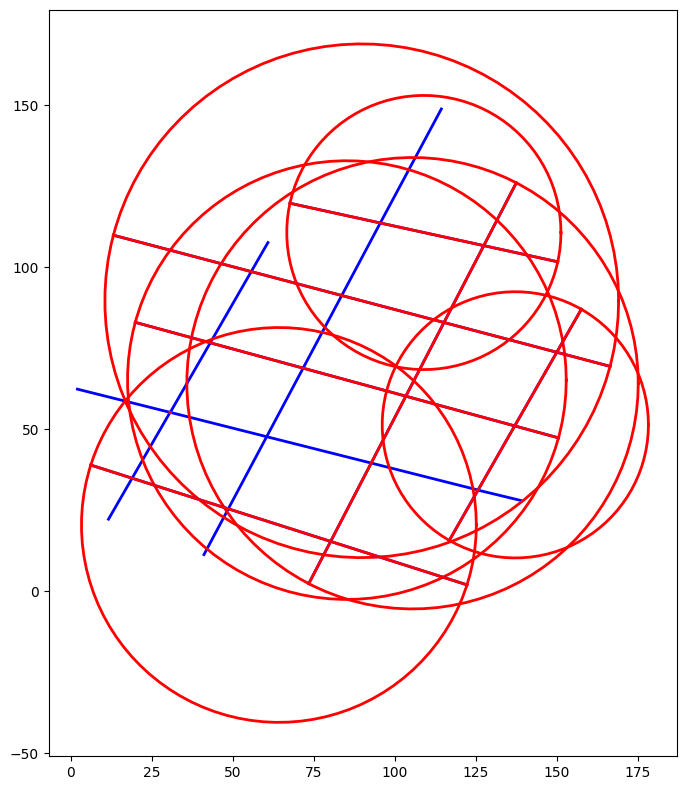

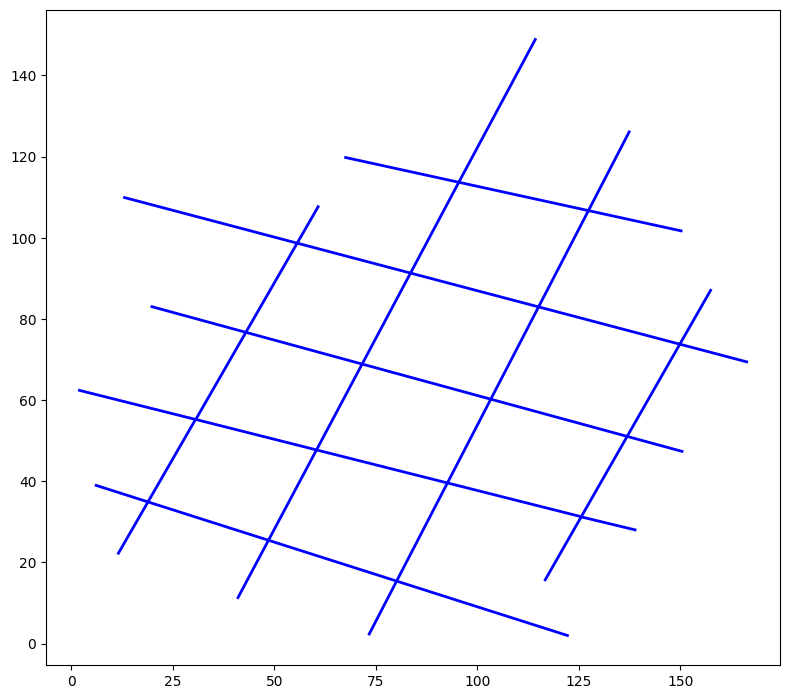

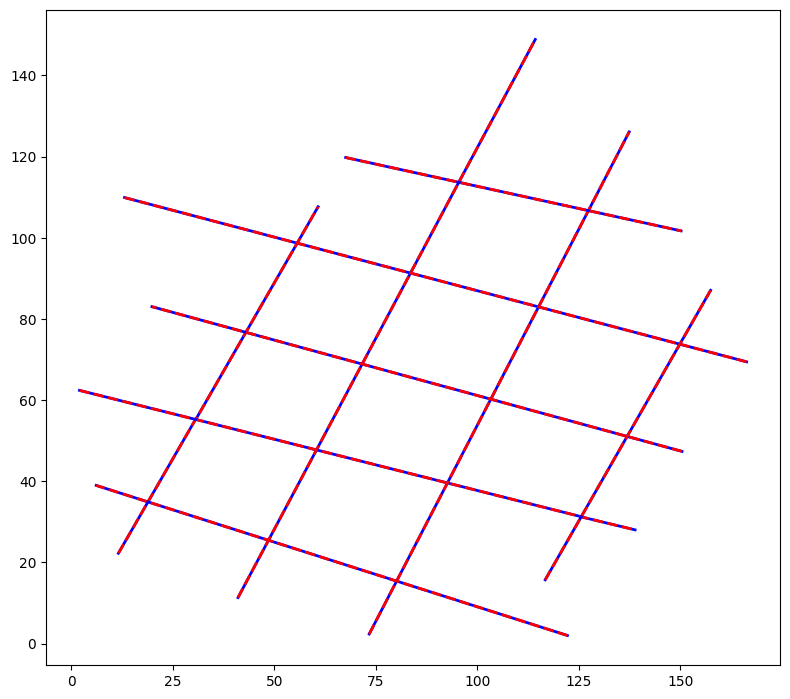

Testing isolated.csv...


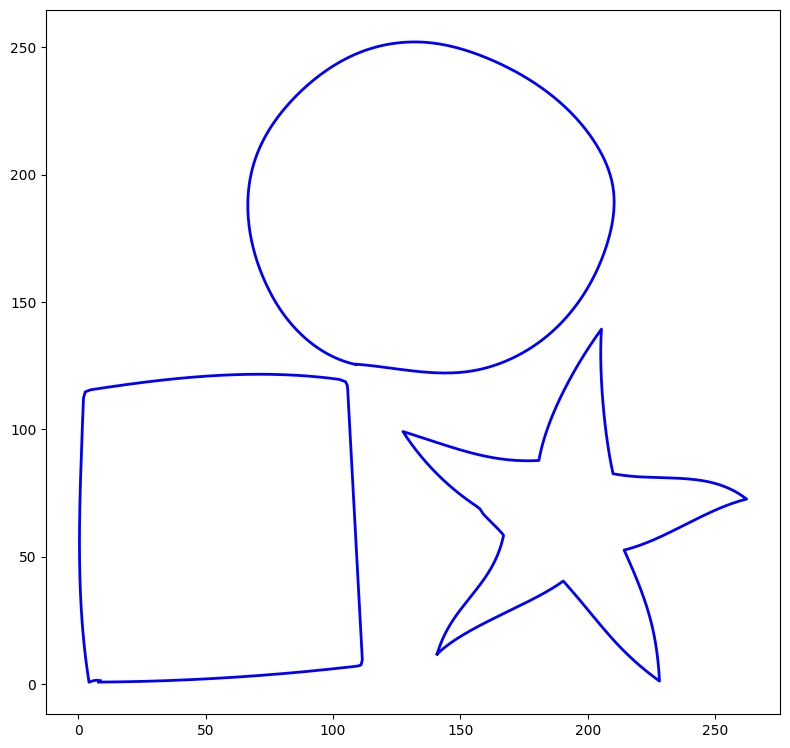

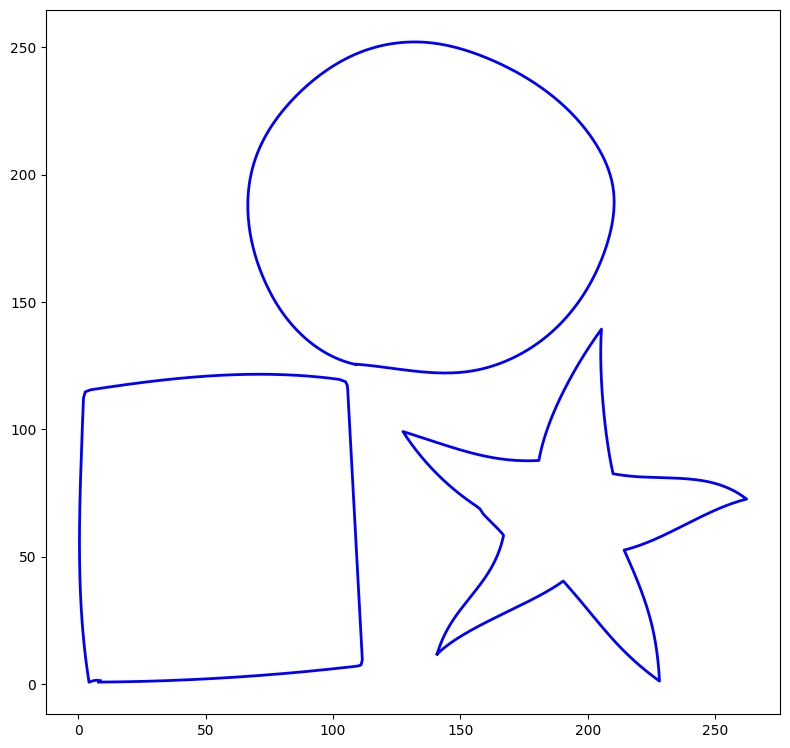

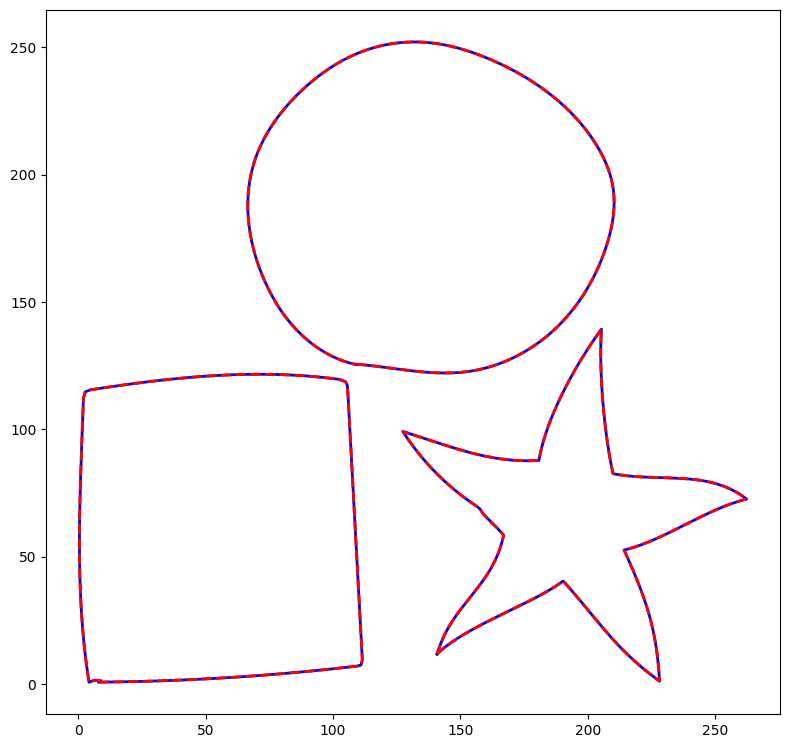

Testing isolated_sol.csv...


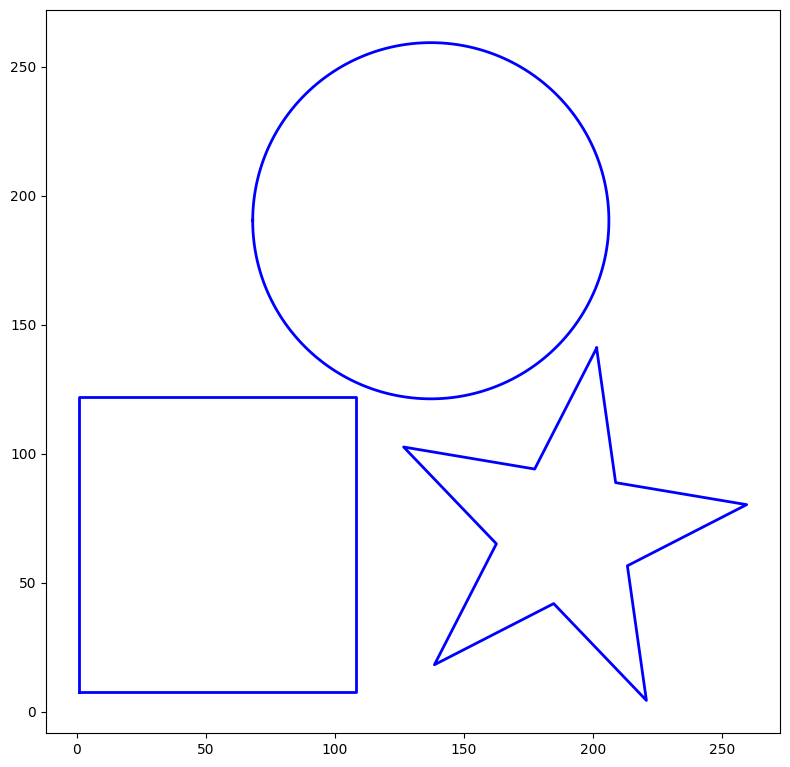

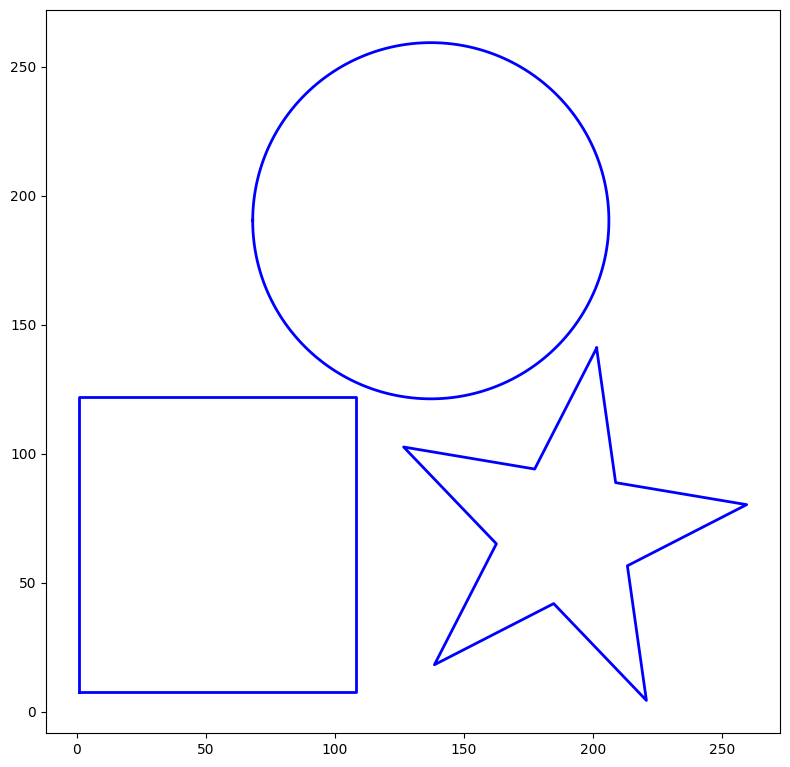

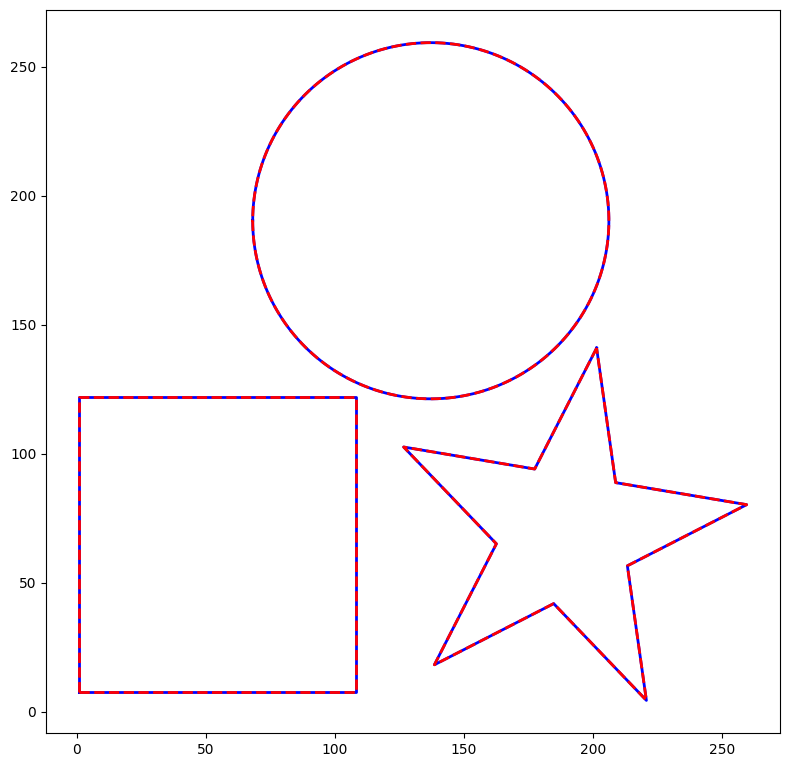

Testing occlusion1.csv...


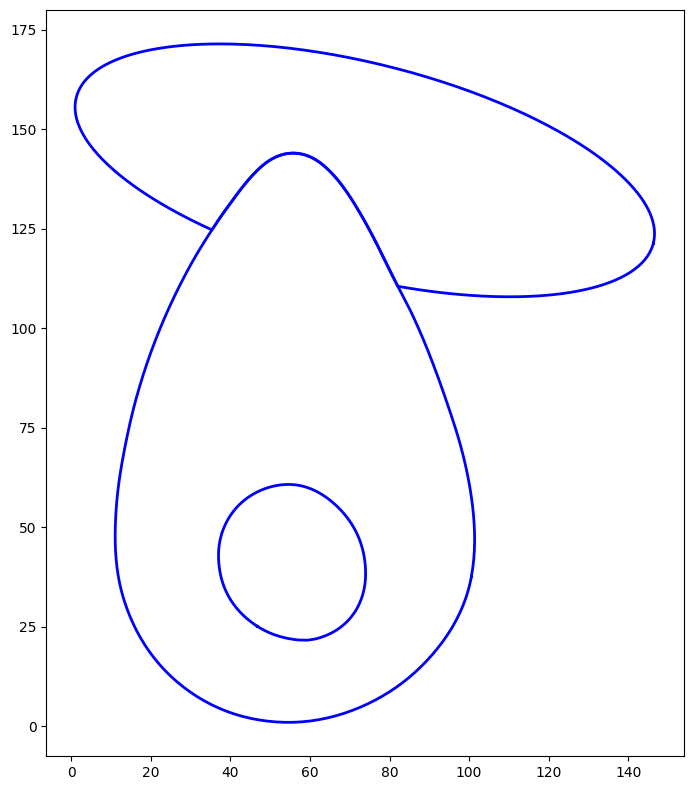

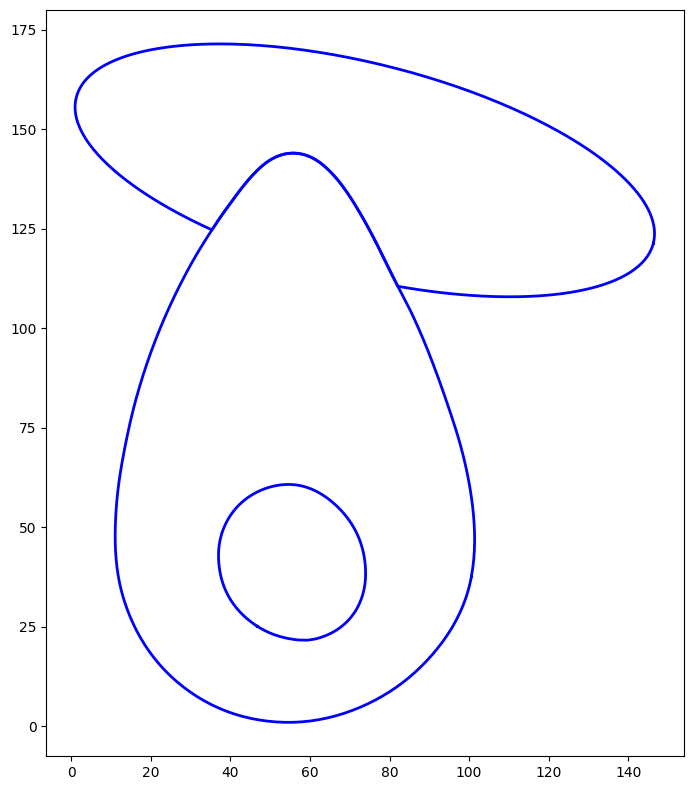

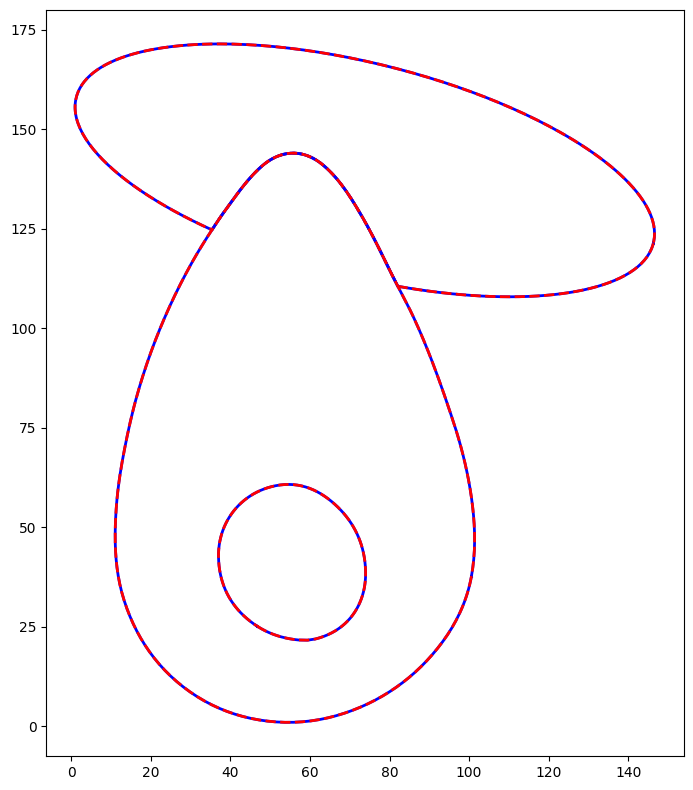

Testing occlusion1_sol.csv...


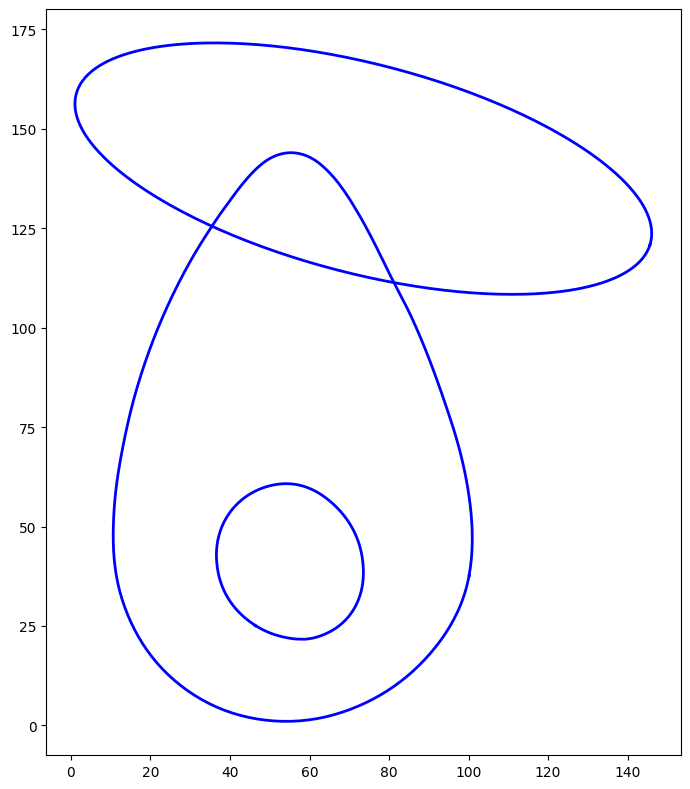

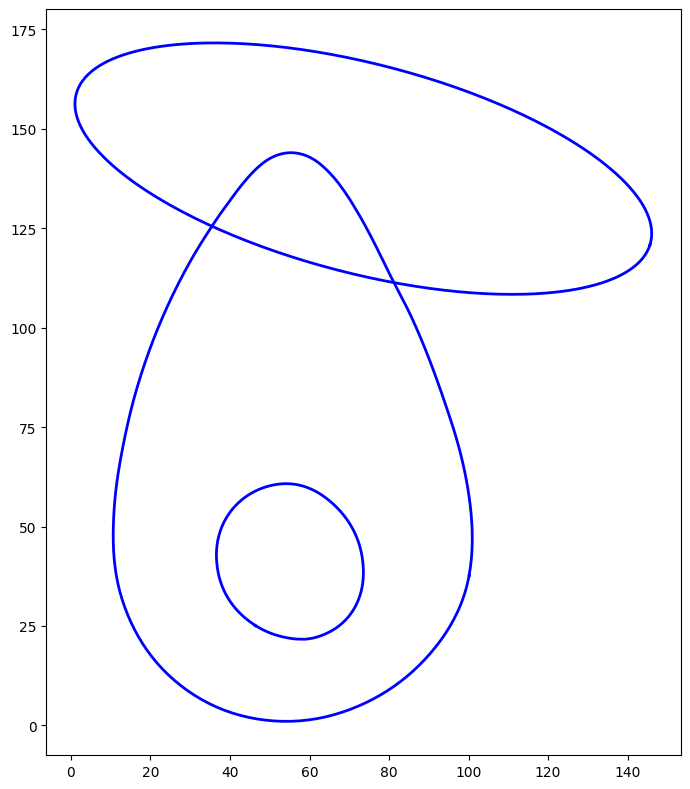

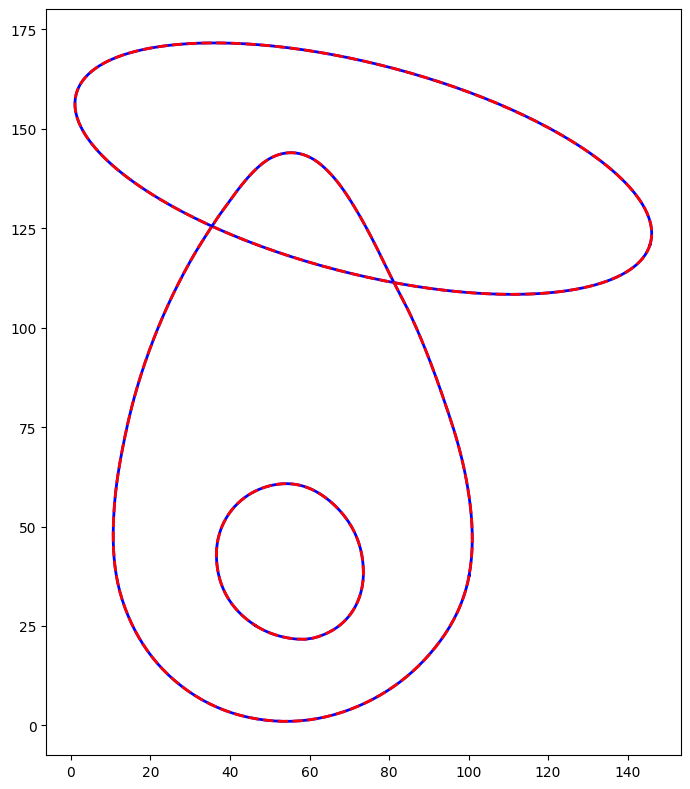

Testing occlusion2.csv...


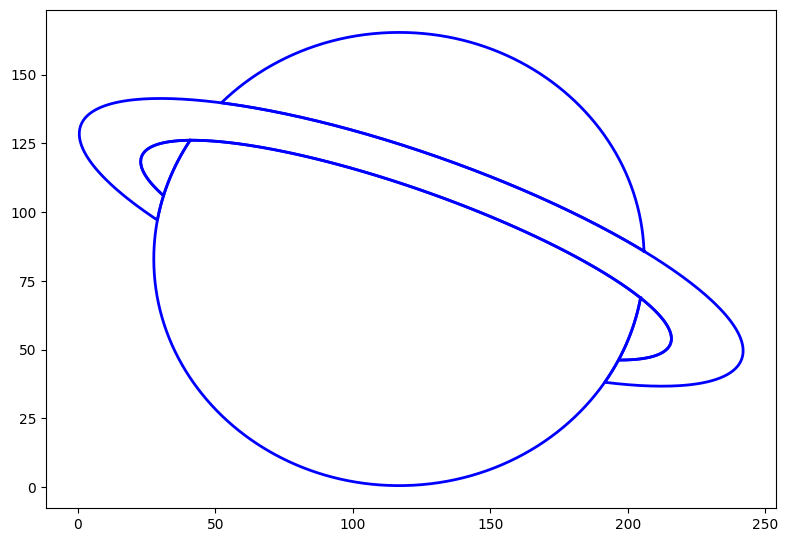

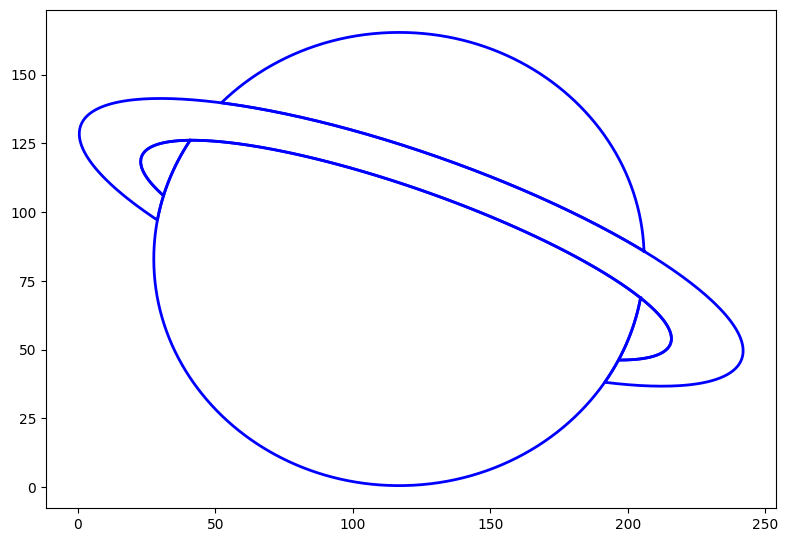

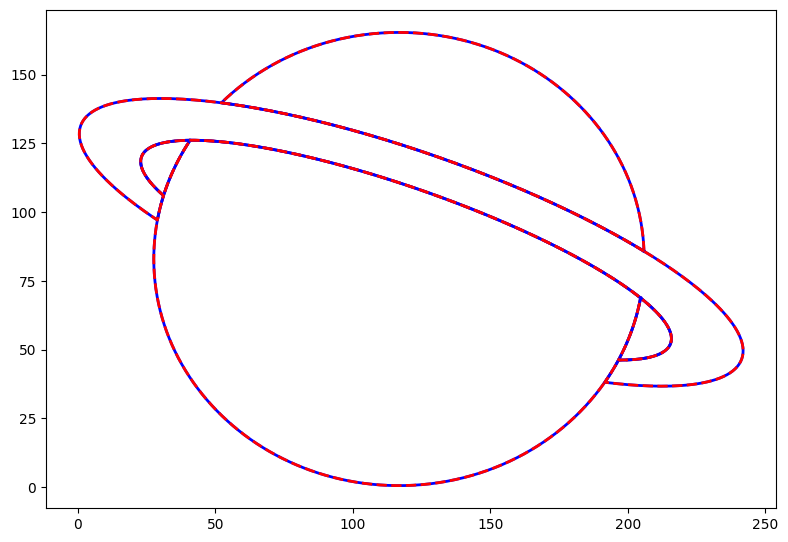

Testing occlusion2_sol.csv...


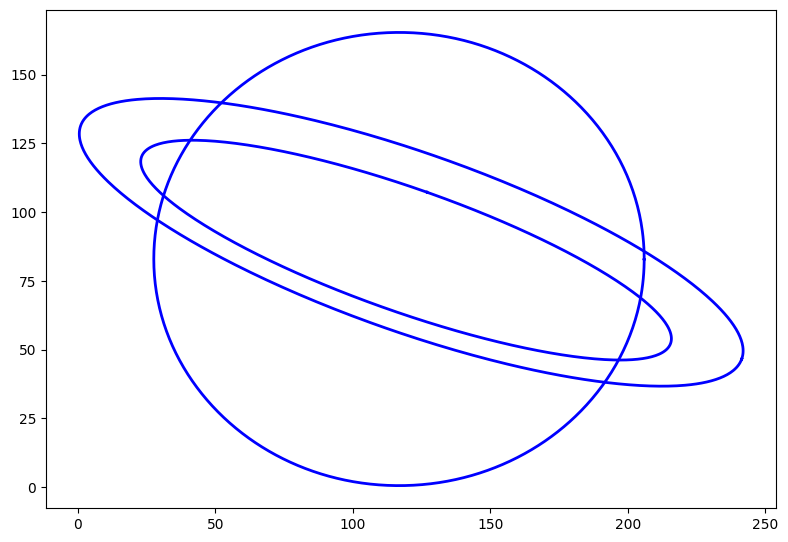

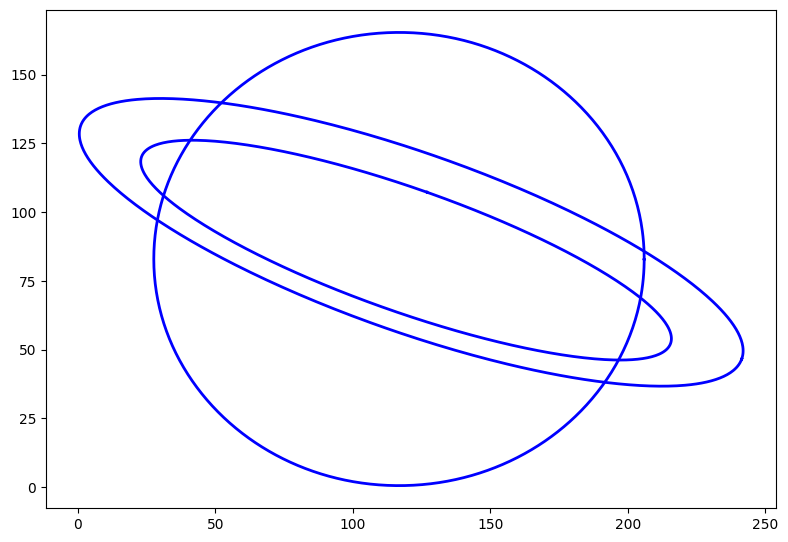

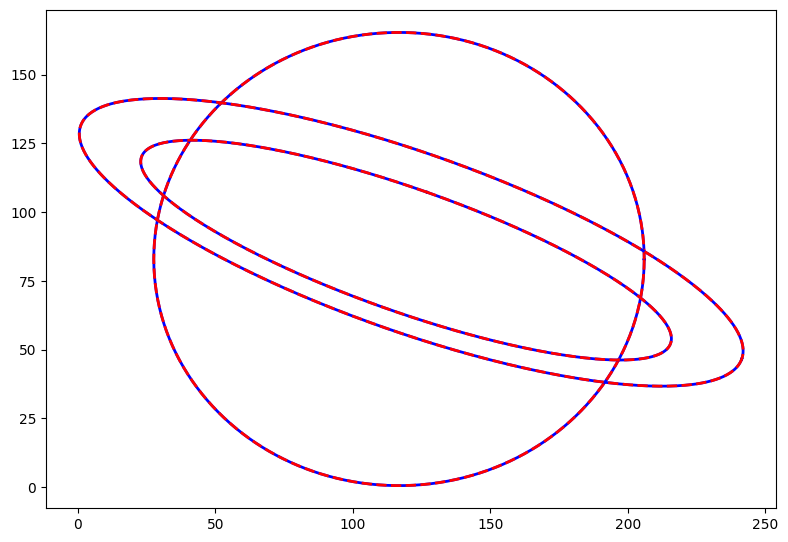

In [9]:
def test_all_cases(directory):
    files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    for file in files:
        print(f"Testing {file}...")
        paths_XYs = read_csv(os.path.join(directory, file))
        visualize_shapes(paths_XYs)
        visualize_symmetry(paths_XYs)
        visualize_curve_completion(paths_XYs)

# Test all cases
test_all_cases("C:/Users/KUMAR BIMAL/Downloads/problems/problems")